source: http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
import pandas as pd
import numpy as np

cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
"relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "target"]
df = pd.read_csv("adult.data", names=cols, index_col=False)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.strip()
        
df.replace("?", np.NaN, inplace=True)        

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.dropna(inplace=True)
print(df.shape)

(30162, 15)


In [3]:
df[["education", "education-num"]].groupby(["education"])["education-num"].max().sort_values()

education
Preschool        1
1st-4th          2
5th-6th          3
7th-8th          4
9th              5
10th             6
11th             7
12th             8
HS-grad          9
Some-college    10
Assoc-voc       11
Assoc-acdm      12
Bachelors       13
Masters         14
Prof-school     15
Doctorate       16
Name: education-num, dtype: int64

In [4]:
y = df['target'].copy()
df.drop(['target'], axis=1, inplace=True)

from sklearn import preprocessing
y_le = preprocessing.LabelEncoder()
y_le.fit(y)
print("classes", y_le.classes_)

y = y_le.transform(y)
print("inv. transform example", y_le.inverse_transform([0, 0, 1]))

classes ['<=50K' '>50K']
inv. transform example ['<=50K' '<=50K' '>50K']


In [5]:
for col in df.columns:
    if df[col].dtype == "object":
        temp_df = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, temp_df], axis=1)
        df.drop([col], axis=1, inplace=True)

8


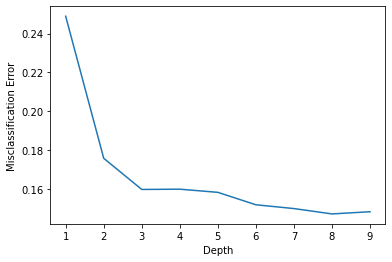

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree

#hyper parameter tuning.Selecting best K
depths = [x for x in range(1, 10)]
# empty list that will hold cv scores
cv_scores = []
for d in depths:
    clf = tree.DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(clf, df, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#misclassification error
MSE = [1-x for x in cv_scores]
#optimal D
optimal_d_index = MSE.index(min(MSE))
optimal_d = depths[optimal_d_index]
print(optimal_d)

# plot misclassification error vs D
plt.plot(depths, MSE)
plt.xlabel('Depth')
plt.ylabel('Misclassification Error')
plt.show()

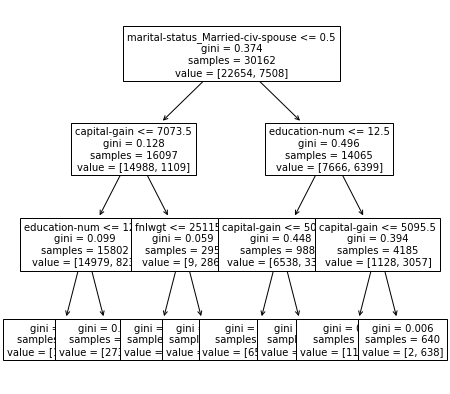

|--- marital-status_Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7073.50
|   |   |--- education-num <= 12.50
|   |   |   |--- class: 0
|   |   |--- education-num >  12.50
|   |   |   |--- class: 0
|   |--- capital-gain >  7073.50
|   |   |--- fnlwgt <= 25115.50
|   |   |   |--- class: 0
|   |   |--- fnlwgt >  25115.50
|   |   |   |--- class: 1
|--- marital-status_Married-civ-spouse >  0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 0
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 1
|   |--- education-num >  12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- class: 1
|   |   |--- capital-gain >  5095.50
|   |   |   |--- class: 1



In [7]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(df, y)

fig, ax = plt.subplots(figsize=(7, 7))
tree.plot_tree(clf, feature_names=list(df.columns), fontsize=10)
plt.show()

print(tree.export_text(clf, feature_names=list(df.columns)))

In [8]:
tf = pd.read_csv("adult.test", names=cols, index_col=False, skiprows=1)

for col in tf.columns:
    if tf[col].dtype == "object":
        tf[col] = tf[col].str.strip()
        
tf.replace("?", np.NaN, inplace=True)        

print(tf.shape)
tf.head()

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
# Show reason for fix
print(tf.target.value_counts())
print(y_le.classes_)

# Fix
tf.target = tf.target.apply(lambda x: '<=50K' if x == '<=50K.' else '>50K')

# Check fix
print(tf.target.value_counts())

<=50K.    12435
>50K.      3846
Name: target, dtype: int64
['<=50K' '>50K']
<=50K    12435
>50K      3846
Name: target, dtype: int64


In [10]:
tf.dropna(inplace=True)
print(tf.shape)

(15060, 15)


In [11]:
ty = tf['target'].copy()
tf.drop(['target'], axis=1, inplace=True)

ty = y_le.transform(ty)

In [12]:
for col in tf.columns:
    if tf[col].dtype == "object":
        temp_df = pd.get_dummies(tf[col], prefix=col)
        tf = pd.concat([tf, temp_df], axis=1)
        tf.drop([col], axis=1, inplace=True)

In [13]:
# Fix missing feature
tf['Holand-Netherlands'] = 0

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred = clf.predict(tf)
print(1 - accuracy_score(ty, pred))
print(confusion_matrix(ty, pred))

0.16088977423638773
[[10770   590]
 [ 1833  1867]]
